# Importando  as bibliotecas no meu ambiente de trabalho.

In [ ]:
import numpy as np # Baixando as bubliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Criando no meu ambiente de trabalho o meu drive.

In [ ]:
# Criando meu ambiênte.
from google.colab import drive
drive.mount('/content/drive')


# Caminho completo até o arquivo para importar o dataset
caminho_arquivo = '/content/drive/MyDrive/Bootcamp residencia em IA/bootcamp_train.csv'


# Carregando a base de dados
df = pd.read_csv(caminho_arquivo)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Mostrar toral de linhas do dataset
print(f"O dataset possui {len(df)} linhas.")


O dataset possui 3390 linhas.


# Visualizando as primeiras 20 linhas do dataset.

In [ ]:


# Visualizando as primeiras linhas
df.head(20)


,id,x_minimo,x_maximo,y_minimo,y_maximo,peso_da_placa,area_pixels,perimetro_x,perimetro_y,soma_da_luminosidade,...,indice_de_luminosidade,sigmoide_das_areas,minimo_da_luminosidade,falha_1,falha_2,falha_3,falha_4,falha_5,falha_6,falha_outros
0,0,154,169.0,260124,260136,100,75,27,17,9948.0,...,0.0362,0.3068,125,False,0,False,False,não,False,Sim
1,1,1121,-186.0,1789332,1789337,100,-206,9,-194,2240.0,...,0.0294,0.1441,115,False,False,False,True,Não,False,Não
2,2,41,216.0,2708878,2708939,100,6298,275,134,654634.0,...,-0.1879,1.0000,42,False,False,True,False,não,False,Não
3,3,129,157.0,86408,86427,100,276,39,26,33858.0,...,-0.0416,0.8223,115,False,False,True,False,não,False,Não
4,4,436,442.0,4959398,530985,100,63,17,17,6374.0,...,-0.2096,0.2083,90,False,True,False,False,Não,False,Não
5,5,-11,-186.0,590440,590503,100,-206,198,119,637317.0,...,-0.1895,1.0000,45,False,False,True,False,não,False,Não
6,6,39,217.0,1359602,1359742,100,10276,552,319,1187807.0,...,-0.0970,1.0000,25,0,False,True,False,não,False,Não
7,7,43,200.0,696884,696948,100,-206,206,129,626256.0,...,-0.1925,1.0000,45,False,False,True,False,não,False,Não
8,8,772,777.0,1436089,1436092,100,11,-229,3,1398.0,...,-0.0071,0.1284,111,False,False,False,True,Não,False,Não
9,9,41,-186.0,1505915,1505982,100,6494,315,145,671353.0,...,-0.1923,1.0000,38,False,False,True,False,não,False,Não


# Gerando informações referentes aos tipos de dados.

In [ ]:
df.dtypes
#Gerando o tipo de dados do dataframe.

,0
id,int64
x_minimo,int64
x_maximo,float64
y_minimo,int64
y_maximo,int64
peso_da_placa,int64
area_pixels,int64
perimetro_x,int64
perimetro_y,int64
soma_da_luminosidade,float64


# Listar a quantidade de dados numéricos e o percentual de cada em relação ao total.

In [ ]:
# Quantidade de váriaveis númericas, string e boleanas e o percentual em relacao do total

numeric_cols = df.select_dtypes(include=np.number).columns
string_cols = df.select_dtypes(include=object).columns
bool_cols = df.select_dtypes(include=bool).columns

num_numeric = len(numeric_cols)
num_string = len(string_cols)
num_bool = len(bool_cols)

total_cols = len(df.columns)

print("Total de variáveis:", len(df.columns))
print("Quantidade de variáveis numéricas:", num_numeric)
print(f"Percentual de váriáveis numéricas: {(num_numeric/total_cols)*100:.2f}%")
print("Quantidade de variáveis string:", num_string)
print(f"Percentual de variáveis string: {(num_string/total_cols)*100:.2f}%")
print("Quantidade de variáveis booleanas:", num_bool)
print(f"Percentual de variáveis booleanas: {(num_bool/total_cols)*100:.2f}%")

Total de variáveis: 39
Quantidade de variáveis numéricas: 30
Percentual de váriáveis numéricas: 76.92%
Quantidade de variáveis string: 7
Percentual de variáveis string: 17.95%
Quantidade de variáveis booleanas: 2
Percentual de variáveis booleanas: 5.13%


# Verificar quais variáveis possuem valores nulos.

In [ ]:
null_counts = df.isnull().sum()

# Total de variáveis nulas
total_nulls = null_counts.sum()
print(f"\nTotal de valores nulos em todo o DataFrame: {total_nulls}")

# Percentual de valores nulo no dataframe
total_null_percentage = (total_nulls / (len(df) * len(df.columns))) * 100
print(f"\nPercentual total de valores nulos no DataFrame: {total_null_percentage:.2f}%")

# Variaveis nulas e a quantidade
print("\nVariáveis com valores nulos:")
print(null_counts[null_counts > 0])

# Percentual nulo por variável
null_percentages = (null_counts / len(df)) * 100
print("\nPercentual de valores nulos por variável:")
print(null_percentages[null_percentages > 0])


Total de valores nulos em todo o DataFrame: 516

Percentual total de valores nulos no DataFrame: 0.39%

Variáveis com valores nulos:
x_maximo                      56
soma_da_luminosidade         100
maximo_da_luminosidade        98
tipo_do_aço_A400              76
espessura_da_chapa_de_aço     41
index_quadrado                36
indice_global_externo         59
indice_de_luminosidade        50
dtype: int64

Percentual de valores nulos por variável:
x_maximo                     1.651917
soma_da_luminosidade         2.949853
maximo_da_luminosidade       2.890855
tipo_do_aço_A400             2.241888
espessura_da_chapa_de_aço    1.209440
index_quadrado               1.061947
indice_global_externo        1.740413
indice_de_luminosidade       1.474926
dtype: float64


In [ ]:

# Identificar linhas com pelo menos um valor nulo ou string vazia
rows_with_nulls_or_empty = df.isnull() | (df == '')
rows_with_nulls_or_empty = rows_with_nulls_or_empty.any(axis=1)

# Contar o número total de linhas com pelo menos um valor nulo ou string vazia
count_rows_with_nulls_or_empty = rows_with_nulls_or_empty.sum()

count_rows_with_nulls_or_empty


np.int64(481)

# Verificando os valores nulos.

In [ ]:
# Verificando valores nulos.
rows_with_nulls = df.isnull().any(axis=1).sum()
rows_with_empty_strings = (df == '').any(axis=1).sum()
rows_with_nulls_or_empty = rows_with_nulls + rows_with_empty_strings

total_rows = len(df)
percentage_nulls_or_empty = (rows_with_nulls_or_empty / total_rows) * 100

print(f"Number of rows with at least one null or empty value: {rows_with_nulls_or_empty}")
print(f"Percentage of rows with at least one null or empty value: {percentage_nulls_or_empty:.2f}%")

Number of rows with at least one null or empty value: 481
Percentage of rows with at least one null or empty value: 14.19%


# Linhas com valores nulos os mesmos foram substituidos pela mediana.

In [ ]:
# Substituindo valores nulos pela mediana.
for col in numeric_cols:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)



<ipython-input-370-2b6986807dde>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


# Total de linhas do dataframe.

In [ ]:

print(f"O dataset possui {len(df)} linhas.")


O dataset possui 3390 linhas.


# Analisando o total de dados e a quantidade de variaveis que estão com valores em zero e o tipo de cada variavel.

In [ ]:
# Verificar total de variáveis que estão com o valor "0".
zero_counts = (df_novo == 0).sum()

# Total de variáveis com valor 0
total_zeros = zero_counts.sum()
print(f"\nTotal de valores zero em todo o DataFrame: {total_zeros}")

# Percentual de valores zero no dataframe
total_zero_percentage = (total_zeros / (len(df) * len(df.columns))) * 100
print(f"\nPercentual total de valores zero no DataFrame: {total_zero_percentage:.2f}%")

# Variáveis com valores zero e a quantidade
print("\nVariáveis com valores zero:")
print(zero_counts[zero_counts > 0])

# Percentual zero por variável
zero_percentages = (zero_counts / len(df)) * 100
print("\nPercentual de valores zero por variável:")
print(zero_percentages[zero_percentages > 0])



Total de valores zero em todo o DataFrame: 5902

Percentual total de valores zero no DataFrame: 4.46%

Variáveis com valores zero:
id                           1
x_minimo                    30
index_de_bordas             47
index_vazio                  1
indice_global_externo     1135
log_indice_y                 1
indice_de_orientaçao       135
minimo_da_luminosidade       2
falha_3                   2347
falha_6                   2203
dtype: int64

Percentual de valores zero por variável:
id                         0.029499
x_minimo                   0.884956
index_de_bordas            1.386431
index_vazio                0.029499
indice_global_externo     33.480826
log_indice_y               0.029499
indice_de_orientaçao       3.982301
minimo_da_luminosidade     0.058997
falha_3                   69.233038
falha_6                   64.985251
dtype: float64


# Mostrando variaveis que possuem valores negativos.

In [ ]:
# Verificando variaveis com valores negativos.

colunas_com_negativos = []

for coluna in numeric_cols:

    if (df[coluna] < 0).any():
        colunas_com_negativos.append(coluna)

print("Colunas com valores negativos:", colunas_com_negativos)


Colunas com valores negativos: ['x_minimo', 'x_maximo', 'y_minimo', 'y_maximo', 'area_pixels', 'perimetro_x', 'perimetro_y', 'comprimento_do_transportador', 'espessura_da_chapa_de_aço', 'indice_de_variacao_x', 'indice_de_variacao_y', 'indice_de_orientaçao', 'indice_de_luminosidade']


# Tratando os valores de dados negativos e transformando eles em positivos.

In [ ]:
# Transformando os valores negativos em positivos.
for col in colunas_com_negativos:
    df[col] = df[col].abs()


In [ ]:
# Verificando se ainda ha valores negativos.
colunas_com_negativos = []

for coluna in numeric_cols:
    if (df[coluna] < 0).any():
        colunas_com_negativos.append(coluna)

print("Colunas com valores negativos:", colunas_com_negativos)


Colunas com valores negativos: []


In [ ]:
print(f"O dataset possui {len(df)} linhas.")

O dataset possui 3390 linhas.


# Exibindo as primeiras 20 linhas de dados do dataframe sem os valores negativos problemáticos.

In [ ]:


df.head(20)


,id,x_minimo,x_maximo,y_minimo,y_maximo,peso_da_placa,area_pixels,perimetro_x,perimetro_y,soma_da_luminosidade,...,indice_de_luminosidade,sigmoide_das_areas,minimo_da_luminosidade,falha_1,falha_2,falha_3,falha_4,falha_5,falha_6,falha_outros
0,0,154,169.0,260124,260136,100,75,27,17,9948.0,...,0.0362,0.3068,125,False,0,False,False,não,False,Sim
1,1,1121,186.0,1789332,1789337,100,206,9,194,2240.0,...,0.0294,0.1441,115,False,False,False,True,Não,False,Não
2,2,41,216.0,2708878,2708939,100,6298,275,134,654634.0,...,0.1879,1.0000,42,False,False,True,False,não,False,Não
3,3,129,157.0,86408,86427,100,276,39,26,33858.0,...,0.0416,0.8223,115,False,False,True,False,não,False,Não
4,4,436,442.0,4959398,530985,100,63,17,17,6374.0,...,0.2096,0.2083,90,False,True,False,False,Não,False,Não
5,5,11,186.0,590440,590503,100,206,198,119,637317.0,...,0.1895,1.0000,45,False,False,True,False,não,False,Não
6,6,39,217.0,1359602,1359742,100,10276,552,319,1187807.0,...,0.0970,1.0000,25,0,False,True,False,não,False,Não
7,7,43,200.0,696884,696948,100,206,206,129,626256.0,...,0.1925,1.0000,45,False,False,True,False,não,False,Não
8,8,772,777.0,1436089,1436092,100,11,229,3,1398.0,...,0.0071,0.1284,111,False,False,False,True,Não,False,Não
9,9,41,186.0,1505915,1505982,100,6494,315,145,671353.0,...,0.1923,1.0000,38,False,False,True,False,não,False,Não


# Visualizando os nomes corretos de cada coluna / variavel do dataframe para posterior tratamento.

In [ ]:
# Visualização dos nomes das variaveis.
column_names = df.columns.tolist()
column_names


['id',
 'x_minimo',
 'x_maximo',
 'y_minimo',
 'y_maximo',
 'peso_da_placa',
 'area_pixels',
 'perimetro_x',
 'perimetro_y',
 'soma_da_luminosidade',
 'maximo_da_luminosidade',
 'comprimento_do_transportador',
 'tipo_do_aço_A300',
 'tipo_do_aço_A400',
 'espessura_da_chapa_de_aço',
 'temperatura',
 'index_de_bordas',
 'index_vazio',
 'index_quadrado',
 'index_externo_x',
 'indice_de_bordas_x',
 'indice_de_bordas_y',
 'indice_de_variacao_x',
 'indice_de_variacao_y',
 'indice_global_externo',
 'log_das_areas',
 'log_indice_x',
 'log_indice_y',
 'indice_de_orientaçao',
 'indice_de_luminosidade',
 'sigmoide_das_areas',
 'minimo_da_luminosidade',
 'falha_1',
 'falha_2',
 'falha_3',
 'falha_4',
 'falha_5',
 'falha_6',
 'falha_outros']

In [ ]:
# Salvando novo dataframe com as alterações no drive.
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

df_tipoaco = pd.read_csv('/content/drive/MyDrive/Bootcamp residencia em IA/bootcamp_train_sem_negativos.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Transformando os dados das colunas do tipo de falha em dados numéricos.

In [ ]:
# Convertendo as colunas falha em numericos e substituindo o que é true por 1 e false por 0, e suas equivalencias.

# Convert 'falha_3' and 'falha_6' to numeric, replacing True/False with 1/0
mapping = {True: 1, False: 0, 'True':1, 'False':0, 1:1, 0:0, 's':1, 'S':1, 'Sim':1, 'sim':1, 'y':1, 'Y':1, 'n':0, 'N':0, 'Não':0, 'não':0, 'Nao':0, 'nao':0, 'no':0, 'not':0}
for col in ['falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'falha_outros']:
    df_tipoaco[col] = df_tipoaco[col].map(mapping).fillna(df_tipoaco[col])
    df_tipoaco[col] = pd.to_numeric(df_tipoaco[col], errors='coerce').astype('Int64')


In [ ]:
falha_cols = ['falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'falha_outros']


# Mostrando os dados.

In [ ]:
# Visualizando os novos dados tratados.
print("Valores únicos ANTES da conversão:\n")
for col in falha_cols:
    if col in df_tipoaco.columns:
        print(f"{col}: {df_tipoaco[col].unique()}")
    else:
        print(f"{col}: coluna não encontrada no DataFrame.")


Valores únicos ANTES da conversão:

falha_1: <IntegerArray>
[0, 1]
Length: 2, dtype: Int64
falha_2: <IntegerArray>
[0, 1]
Length: 2, dtype: Int64
falha_3: <IntegerArray>
[0, 1]
Length: 2, dtype: Int64
falha_4: <IntegerArray>
[0, 1]
Length: 2, dtype: Int64
falha_5: <IntegerArray>
[0, 1]
Length: 2, dtype: Int64
falha_6: <IntegerArray>
[0, 1]
Length: 2, dtype: Int64
falha_outros: <IntegerArray>
[1, 0]
Length: 2, dtype: Int64


# Criando a coluna falha com todos os registros de falha contidos nela.

In [ ]:
# Gerando uma nova coluna do tipo object com o nome de " falha".
import pandas as pd
import numpy as np


failure_types = ['falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'falha_outros']

num_rows = len(df_tipoaco)

occurrences_per_type = num_rows // len(failure_types)
remainder = num_rows % len(failure_types)

failure_list = []

for failure_type in failure_types:
    failure_list.extend([failure_type] * occurrences_per_type)

for i in range(remainder):
    failure_list.append(failure_types[i])

failure_list = np.random.permutation(failure_list).tolist()


df_tipoaco['falha'] = failure_list

print(df_tipoaco.head())


   id  x_minimo  x_maximo  y_minimo  y_maximo  peso_da_placa  area_pixels  \
0   0       154     169.0    260124    260136            100           75   
1   2        41     216.0   2708878   2708939            100         6298   
2   3       129     157.0     86408     86427            100          276   
3   4       436     442.0   4959398    530985            100           63   
4   6        39     217.0   1359602   1359742            100        10276   

   perimetro_x  perimetro_y  soma_da_luminosidade  ...  sigmoide_das_areas  \
0           27           17                9948.0  ...              0.3068   
1          275          134              654634.0  ...              1.0000   
2           39           26               33858.0  ...              0.8223   
3           17           17                6374.0  ...              0.2083   
4          552          319             1187807.0  ...              1.0000   

   minimo_da_luminosidade falha_1 falha_2  falha_3  falha_4  falha_5

# Visualizando os dados da nova coluna.

In [ ]:
# Visualizando os novos dados gerados.
failure_column_list = df_tipoaco['falha'].tolist()

failure_column_list


['falha_3',
 'falha_6',
 'falha_outros',
 'falha_6',
 'falha_2',
 'falha_6',
 'falha_1',
 'falha_2',
 'falha_4',
 'falha_2',
 'falha_2',
 'falha_2',
 'falha_3',
 'falha_outros',
 'falha_6',
 'falha_2',
 'falha_3',
 'falha_2',
 'falha_4',
 'falha_6',
 'falha_1',
 'falha_outros',
 'falha_outros',
 'falha_1',
 'falha_1',
 'falha_1',
 'falha_5',
 'falha_outros',
 'falha_4',
 'falha_4',
 'falha_4',
 'falha_5',
 'falha_1',
 'falha_2',
 'falha_outros',
 'falha_2',
 'falha_outros',
 'falha_2',
 'falha_outros',
 'falha_5',
 'falha_2',
 'falha_2',
 'falha_4',
 'falha_6',
 'falha_4',
 'falha_outros',
 'falha_4',
 'falha_3',
 'falha_outros',
 'falha_outros',
 'falha_1',
 'falha_5',
 'falha_4',
 'falha_4',
 'falha_outros',
 'falha_5',
 'falha_5',
 'falha_6',
 'falha_2',
 'falha_3',
 'falha_3',
 'falha_1',
 'falha_5',
 'falha_outros',
 'falha_3',
 'falha_5',
 'falha_outros',
 'falha_5',
 'falha_4',
 'falha_outros',
 'falha_outros',
 'falha_4',
 'falha_5',
 'falha_6',
 'falha_3',
 'falha_3',
 'falha_

# Deletando as antigas colunas de falhas.

In [ ]:
# Deletando as colunas: falha_1, falha_2, falha_3, falha_4, falha_5, falha_6 e falha_outros

columns_to_drop = ['falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'falha_outros']
df_tipoaco = df_tipoaco.drop(columns=columns_to_drop, errors='ignore')


# Criando a nova coluna tipo_aço.

In [ ]:
# Gerando uma nova coluna do tipo object com o nome de " tipo_aço".

import numpy as np

num_rows = len(df_tipoaco)
tipo_aco_values = ['tipo_do_aço_A300', 'tipo_do_aço_A400']
df_tipoaco['tipo_aço'] = np.tile(tipo_aco_values, (num_rows + 1) // 2)[:num_rows]


# Mostrando os dados gerados.

In [ ]:
# Mostrando a nova coluna: tipo_aço

num_rows = len(df_tipoaco)
tipo_aco_values = ['tipo_do_aço_A300', 'tipo_do_aço_A400']
df_tipoaco['tipo_aço'] = np.tile(tipo_aco_values, (num_rows + 1) // 2)[:num_rows]

print(df_tipoaco.head())


   id  x_minimo  x_maximo  y_minimo  y_maximo  peso_da_placa  area_pixels  \
0   0       154     169.0    260124    260136            100           75   
1   2        41     216.0   2708878   2708939            100         6298   
2   3       129     157.0     86408     86427            100          276   
3   4       436     442.0   4959398    530985            100           63   
4   6        39     217.0   1359602   1359742            100        10276   

   perimetro_x  perimetro_y  soma_da_luminosidade  ...  indice_global_externo  \
0           27           17                9948.0  ...                    0.0   
1          275          134              654634.0  ...                    0.0   
2           39           26               33858.0  ...                    0.0   
3           17           17                6374.0  ...                    1.0   
4          552          319             1187807.0  ...                    0.0   

   log_das_areas log_indice_x log_indice_y  indice

# Deletando as antigas colunas de tipo_do_aço_A300 e tipo_do_aço_A400.

In [ ]:
# Deletando as colunas do tipo_do_Aço_A300 e tipo_do_aço_A300.
columns_to_drop = ['tipo_do_aço_A300', 'tipo_do_aço_A400']
df_tipoaco = df_tipoaco.drop(columns=columns_to_drop, errors='ignore')


# Exibindo o dataframe com as alterações feitas.

In [ ]:
# Mostrando as primeiras 20 linhas do dataframe e com  todas as suas colunas para visualizar as alterações feitas.

df_tipoaco.head(20)


,id,x_minimo,x_maximo,y_minimo,y_maximo,peso_da_placa,area_pixels,perimetro_x,perimetro_y,soma_da_luminosidade,...,indice_global_externo,log_das_areas,log_indice_x,log_indice_y,indice_de_orientaçao,indice_de_luminosidade,sigmoide_das_areas,minimo_da_luminosidade,falha,tipo_aço
0,0,154,169.0,260124,260136,100,75,27,17,9948.0,...,0.0,1.8751,1.1761,1.0792,-0.2000,0.0362,0.3068,125,falha_3,tipo_do_aço_A300
1,2,41,216.0,2708878,2708939,100,6298,275,134,654634.0,...,0.0,3.7992,2.2430,1.7853,-0.6514,-0.1879,1.0000,42,falha_6,tipo_do_aço_A400
2,3,129,157.0,86408,86427,100,276,39,26,33858.0,...,0.0,2.4409,1.4472,1.2787,-0.3214,-0.0416,0.8223,115,falha_outros,tipo_do_aço_A300
3,4,436,442.0,4959398,530985,100,63,17,17,6374.0,...,1.0,1.7993,0.7782,1.2305,0.6471,-0.2096,0.2083,90,falha_6,tipo_do_aço_A400
4,6,39,217.0,1359602,1359742,100,10276,552,319,1187807.0,...,0.0,4.0118,2.2504,2.1461,-0.2135,-0.0970,1.0000,25,falha_2,tipo_do_aço_A300
5,9,41,-186.0,1505915,1505982,100,6494,315,145,671353.0,...,0.0,3.8125,2.2330,1.8261,-0.6082,-0.1923,1.0000,38,falha_6,tipo_do_aço_A400
6,10,843,-186.0,6712,6724,100,98,14,12,9016.0,...,1.0,1.9912,0.9542,1.0792,0.2500,-0.2813,0.2150,82,falha_1,tipo_do_aço_A300
7,11,1331,1336.0,4270168,4270218,100,177,15,50,17388.0,...,1.0,2.2480,0.6990,1.6990,0.9000,-0.2325,0.4138,65,falha_2,tipo_do_aço_A400
8,12,-11,835.0,1553913,1553931,100,71,8,19,7972.0,...,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,99,falha_4,tipo_do_aço_A300
9,13,41,210.0,-20,4440576,100,5688,303,154,598976.0,...,0.0,3.7550,2.2279,1.7924,-0.6331,-0.1773,1.0000,43,falha_2,tipo_do_aço_A400


# Deletando a coluna peso_da_placa por ter todos os valores iguais e não ser relevante ao modelo podendo e ainda poder causar ruido.

In [ ]:
# Deletando a coluna peso_da_placa

if 'peso_da_placa' in df_tipoaco.columns:
    df_tipoaco = df_tipoaco.drop(columns=['peso_da_placa'])
    print("Column 'peso_da_placa' deleted successfully.")
else:
    print("Column 'peso_da_placa' not found in the DataFrame.")




Column 'peso_da_placa' deleted successfully.


# Exibindo novamente os dados.

In [ ]:
# Mostrando as primeiras 20 linhas
df_tipoaco.head(20)


,id,x_minimo,x_maximo,y_minimo,y_maximo,area_pixels,perimetro_x,perimetro_y,soma_da_luminosidade,maximo_da_luminosidade,...,indice_global_externo,log_das_areas,log_indice_x,log_indice_y,indice_de_orientaçao,indice_de_luminosidade,sigmoide_das_areas,minimo_da_luminosidade,falha,tipo_aço
0,0,154,169.0,260124,260136,75,27,17,9948.0,143.0,...,0.0,1.8751,1.1761,1.0792,-0.2000,0.0362,0.3068,125,falha_3,tipo_do_aço_A300
1,2,41,216.0,2708878,2708939,6298,275,134,654634.0,126.0,...,0.0,3.7992,2.2430,1.7853,-0.6514,-0.1879,1.0000,42,falha_6,tipo_do_aço_A400
2,3,129,157.0,86408,86427,276,39,26,33858.0,135.0,...,0.0,2.4409,1.4472,1.2787,-0.3214,-0.0416,0.8223,115,falha_outros,tipo_do_aço_A300
3,4,436,442.0,4959398,530985,63,17,17,6374.0,116.0,...,1.0,1.7993,0.7782,1.2305,0.6471,-0.2096,0.2083,90,falha_6,tipo_do_aço_A400
4,6,39,217.0,1359602,1359742,10276,552,319,1187807.0,141.0,...,0.0,4.0118,2.2504,2.1461,-0.2135,-0.0970,1.0000,25,falha_2,tipo_do_aço_A300
5,9,41,-186.0,1505915,1505982,6494,315,145,671353.0,127.0,...,0.0,3.8125,2.2330,1.8261,-0.6082,-0.1923,1.0000,38,falha_6,tipo_do_aço_A400
6,10,843,-186.0,6712,6724,98,14,12,9016.0,102.0,...,1.0,1.9912,0.9542,1.0792,0.2500,-0.2813,0.2150,82,falha_1,tipo_do_aço_A300
7,11,1331,1336.0,4270168,4270218,177,15,50,17388.0,126.0,...,1.0,2.2480,0.6990,1.6990,0.9000,-0.2325,0.4138,65,falha_2,tipo_do_aço_A400
8,12,-11,835.0,1553913,1553931,71,8,19,7972.0,125.0,...,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,99,falha_4,tipo_do_aço_A300
9,13,41,210.0,-20,4440576,5688,303,154,598976.0,125.0,...,0.0,3.7550,2.2279,1.7924,-0.6331,-0.1773,1.0000,43,falha_2,tipo_do_aço_A400


In [ ]:

failure_column = df_tipoaco['falha']

print(failure_column.unique())


['falha_3' 'falha_6' 'falha_outros' 'falha_2' 'falha_1' 'falha_4'
 'falha_5']


In [ ]:
# Dataframe com  alterções

new_df = df_tipoaco.copy()

print(new_df.head(20))


    id  x_minimo  x_maximo  y_minimo  y_maximo  area_pixels  perimetro_x  \
0    0       154     169.0    260124    260136           75           27   
1    2        41     216.0   2708878   2708939         6298          275   
2    3       129     157.0     86408     86427          276           39   
3    4       436     442.0   4959398    530985           63           17   
4    6        39     217.0   1359602   1359742        10276          552   
5    9        41    -186.0   1505915   1505982         6494          315   
6   10       843    -186.0      6712      6724           98           14   
7   11      1331    1336.0   4270168   4270218          177           15   
8   12       -11     835.0   1553913   1553931           71            8   
9   13        41     210.0       -20   4440576         5688          303   
10  15       435     729.0   4737382   4737394         1851          304   
11  16      1214    1222.0    737538    737568          147           28   
12  18      

# Carregando no drive.

In [ ]:
# Carregando o novo dataframe no drive.
df_tipoaco.to_csv('/content/drive/MyDrive/your_filename.csv', index=False)


# Controle do numero de linhas do dataframe

In [ ]:
print(f"O dataset possui {len(df)} linhas.")

O dataset possui 3390 linhas.


# Gerando um histograma de temperatura por falha.

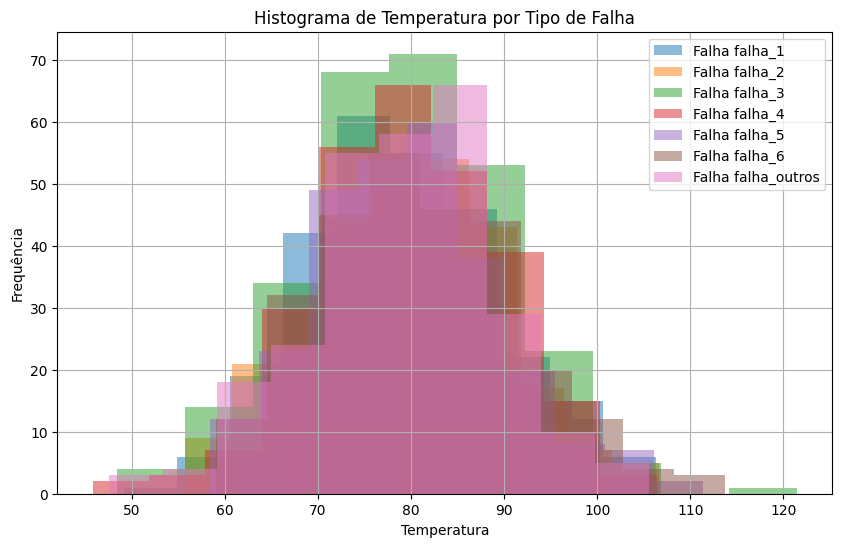

In [ ]:
# Gerando um histograma de temperatura por falha

import matplotlib.pyplot as plt

grouped_data = df_tipoaco.groupby('falha')['temperatura']

plt.figure(figsize=(10, 6))
for failure_type, data in grouped_data:
    plt.hist(data, alpha=0.5, label=f'Falha {failure_type}')

plt.xlabel('Temperatura')
plt.ylabel('Frequência')
plt.title('Histograma de Temperatura por Tipo de Falha')
plt.legend()
plt.grid(True)
plt.show()


# Gerando grafico Boxplot das variaveis numéricas quartis e outliers para análise.

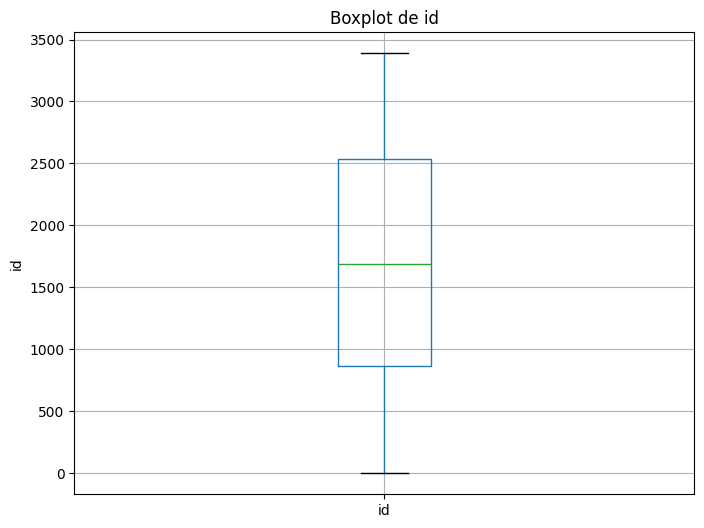

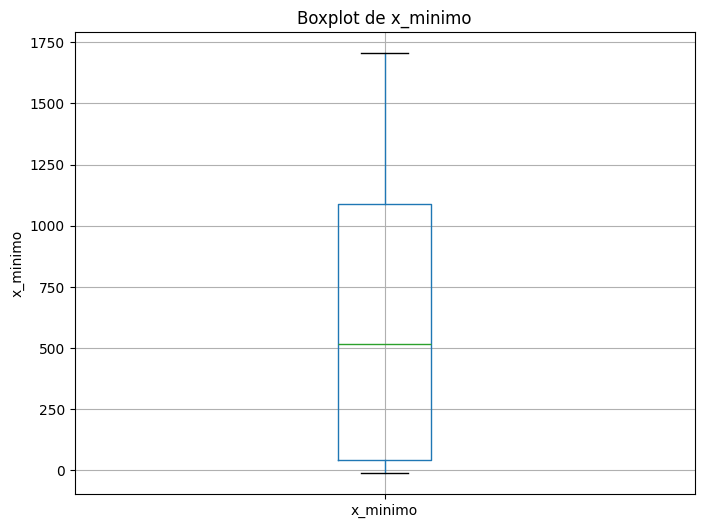

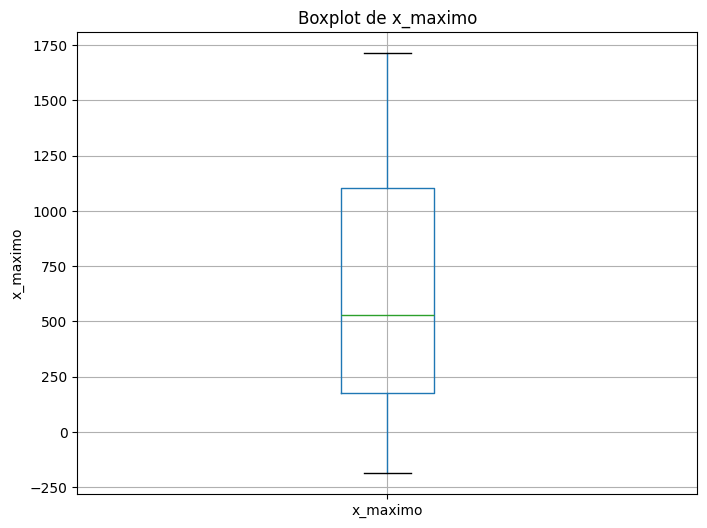

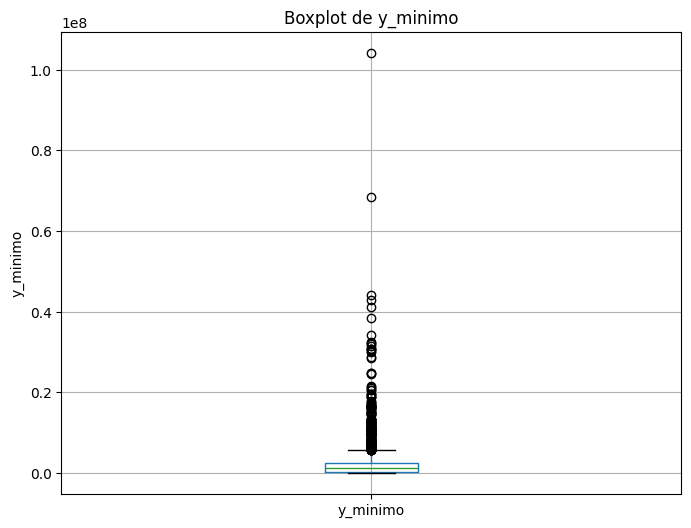

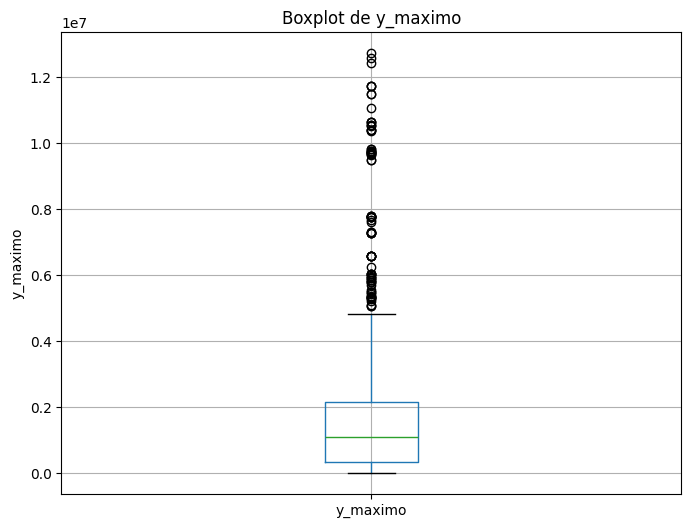

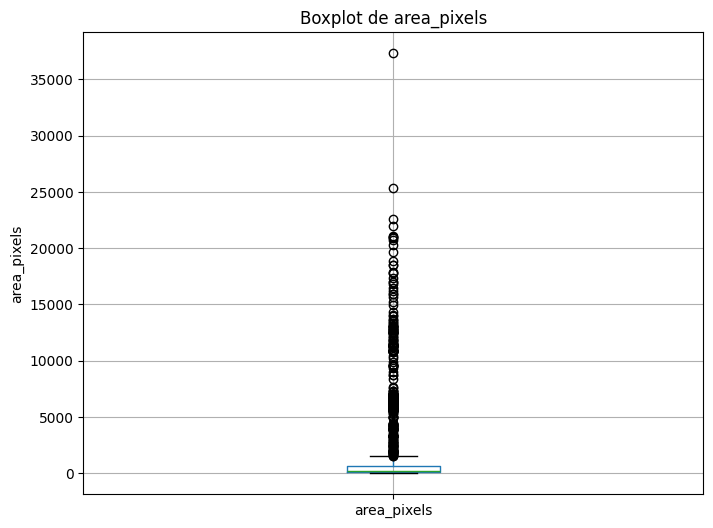

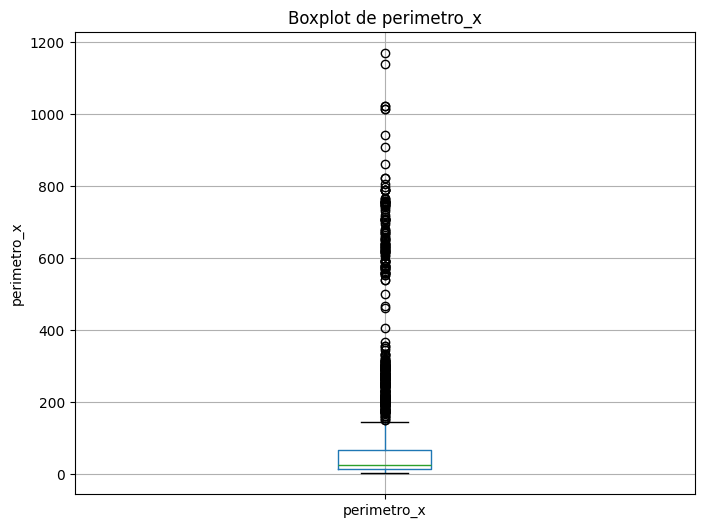

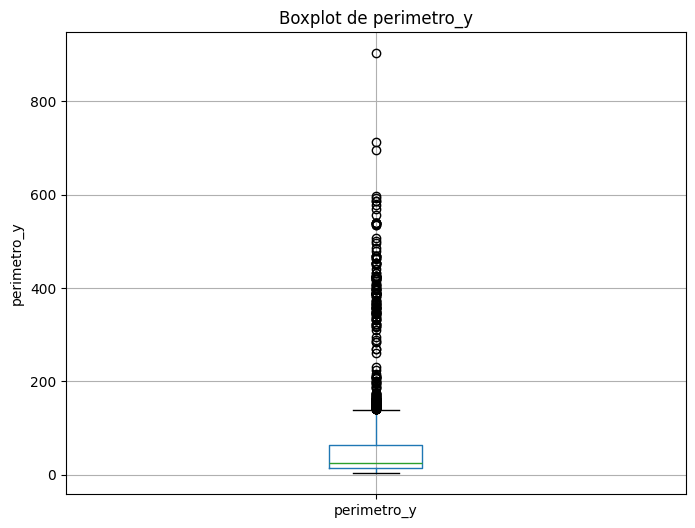

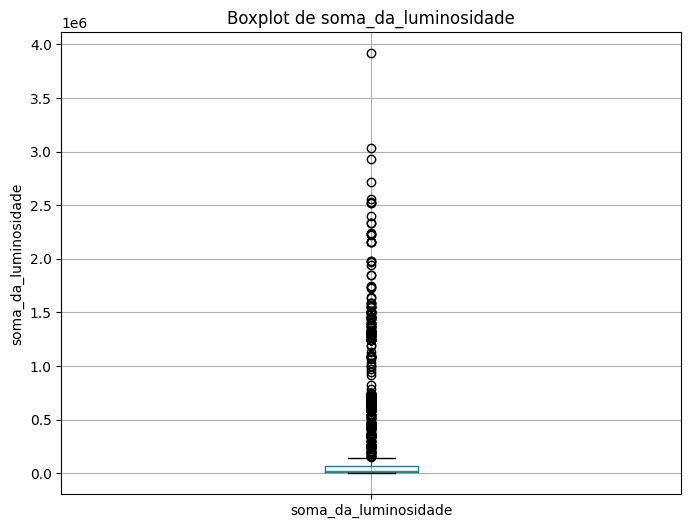

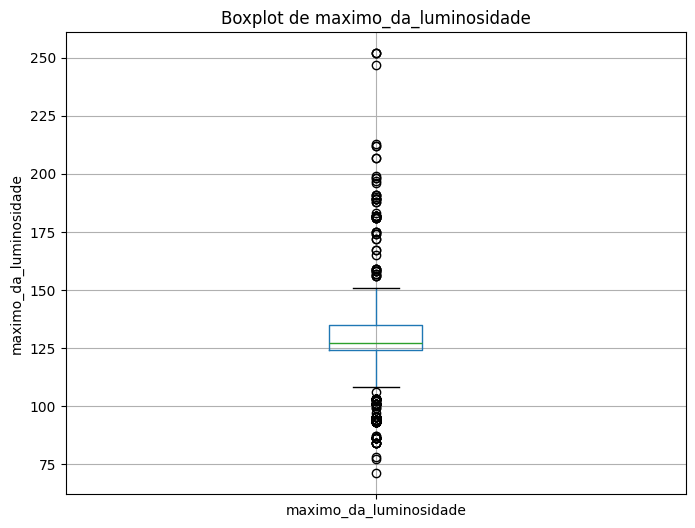

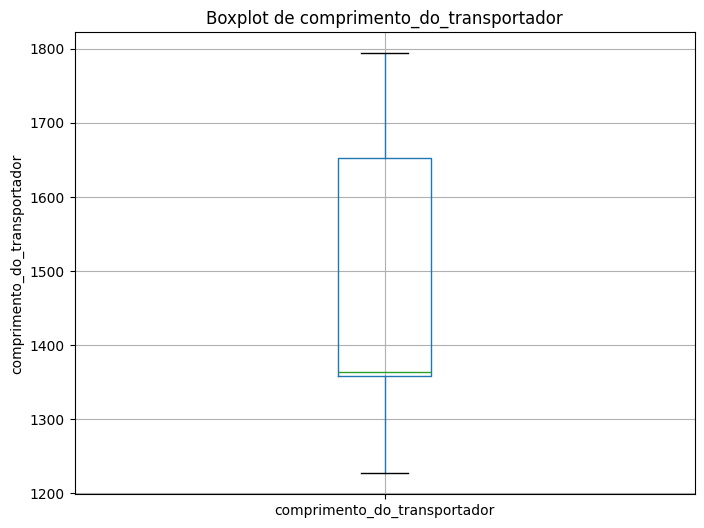

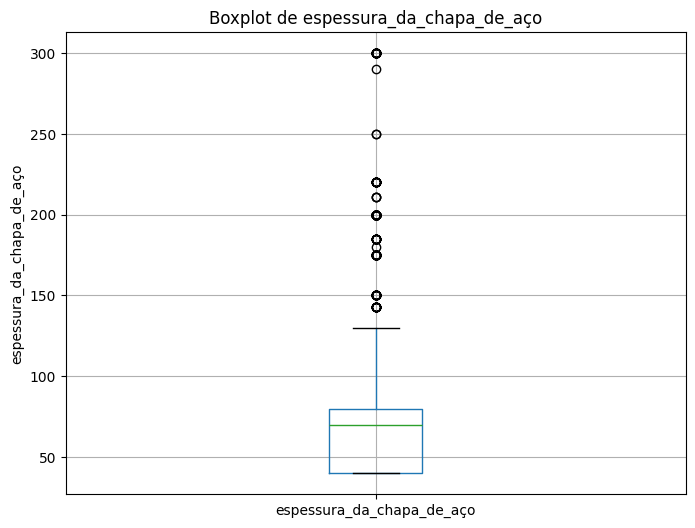

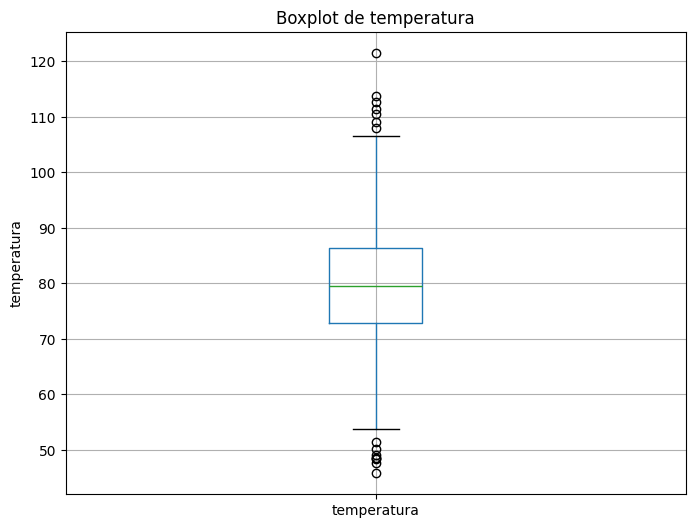

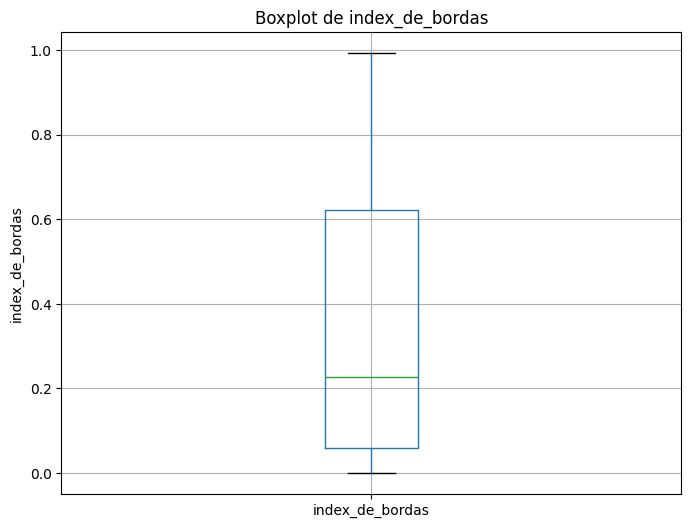

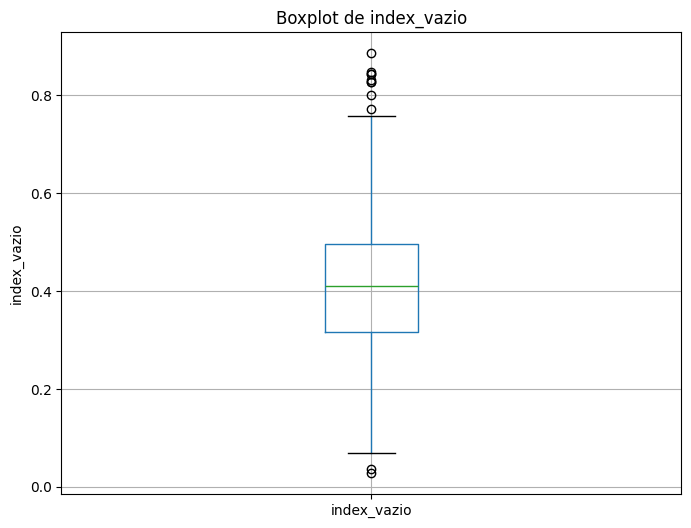

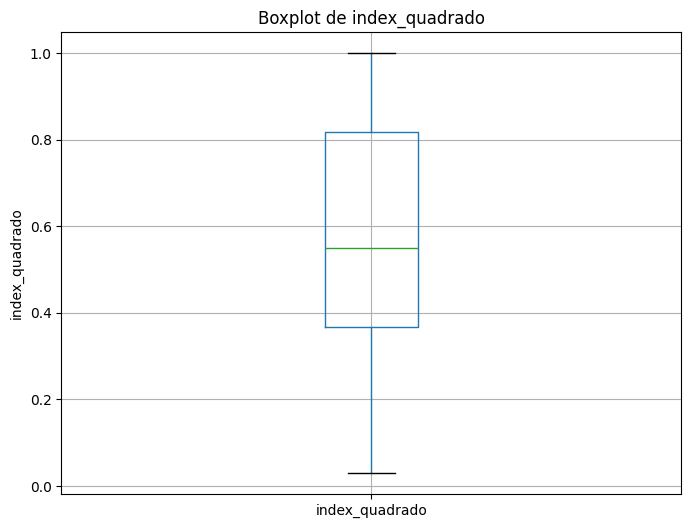

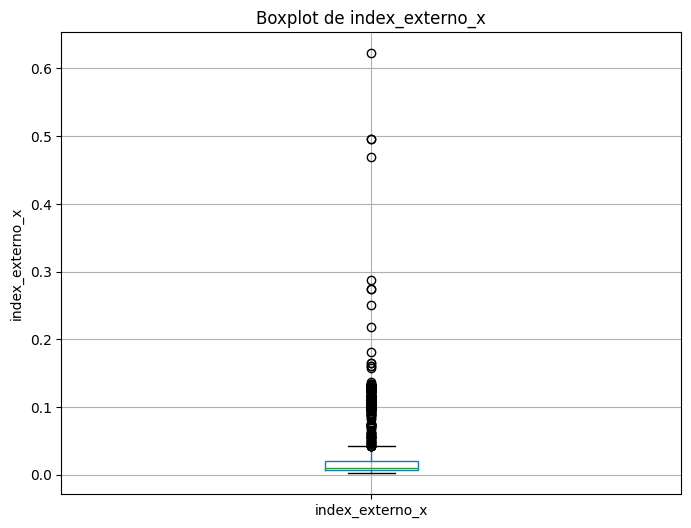

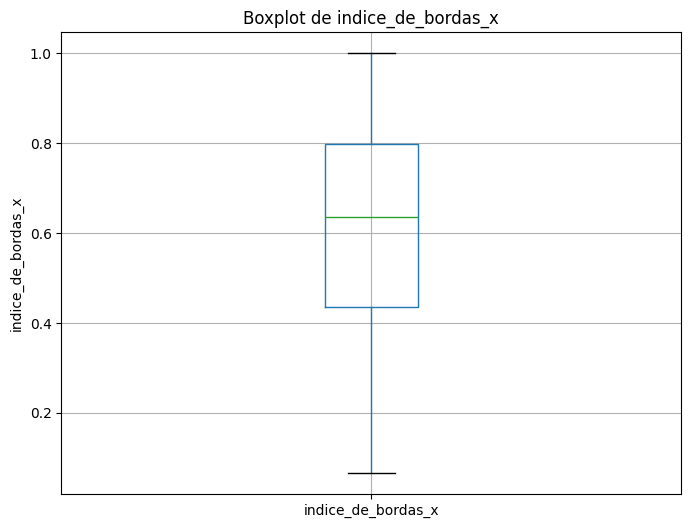

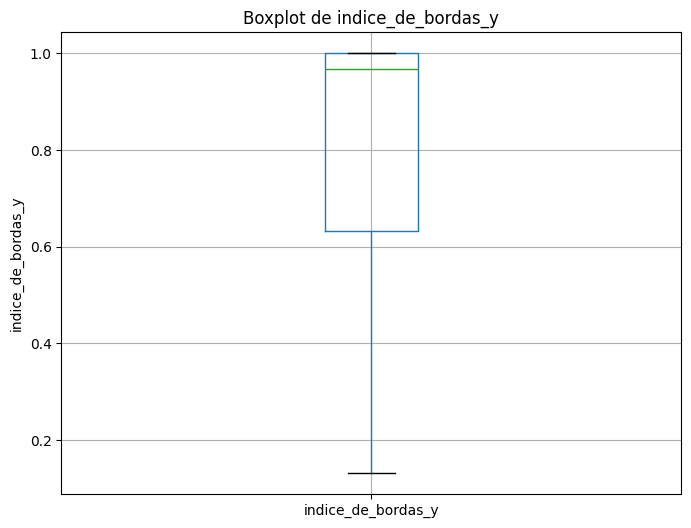

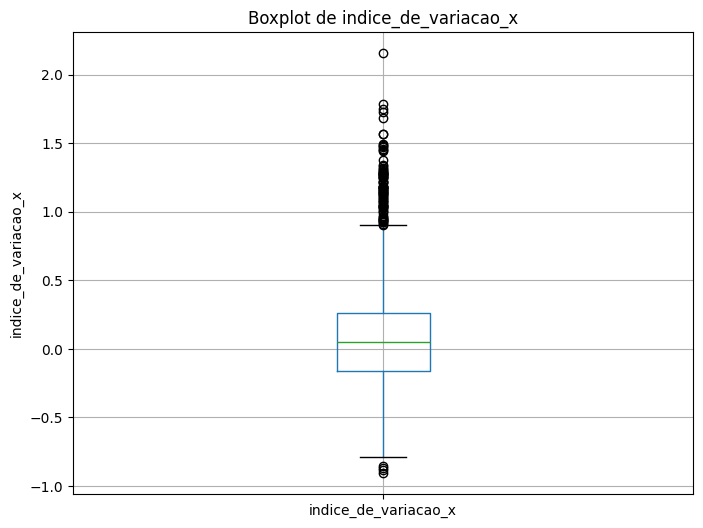

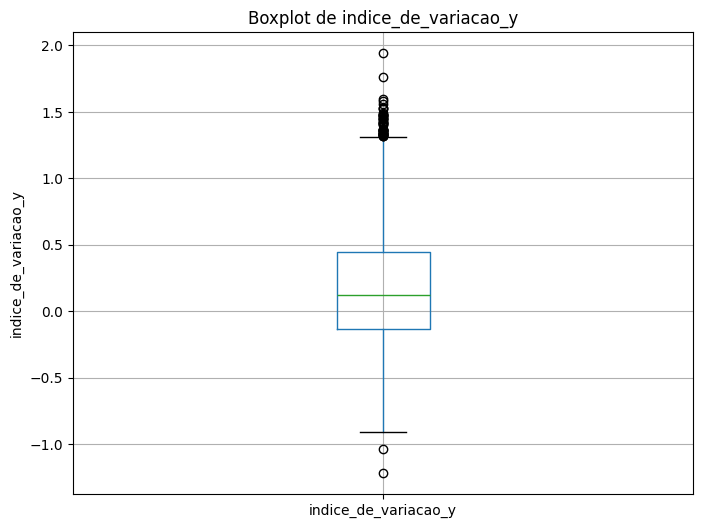

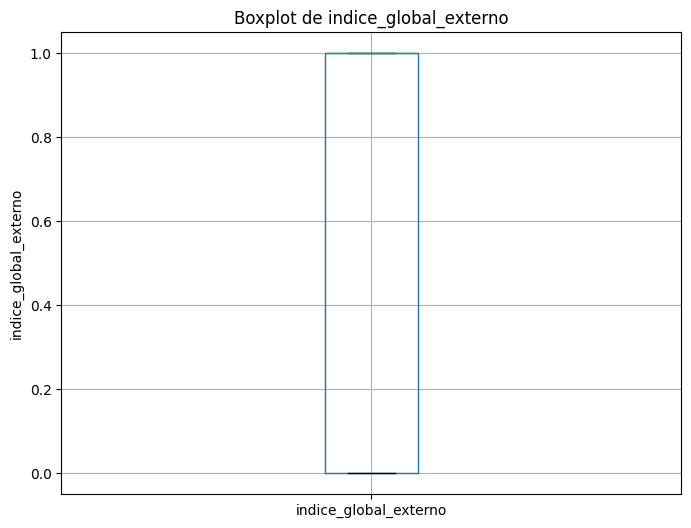

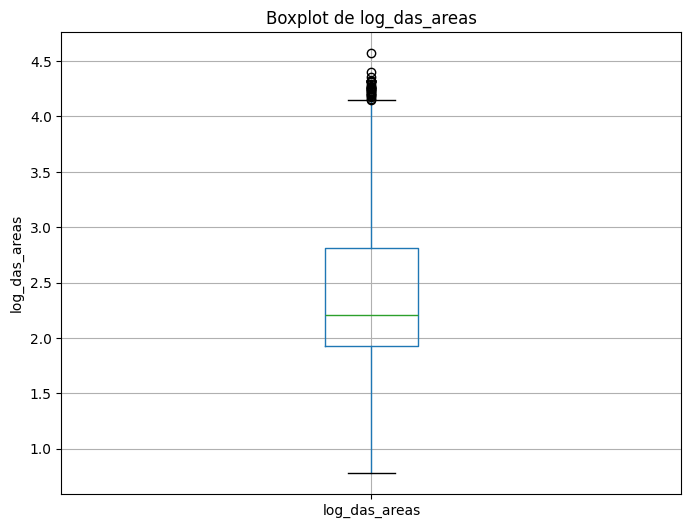

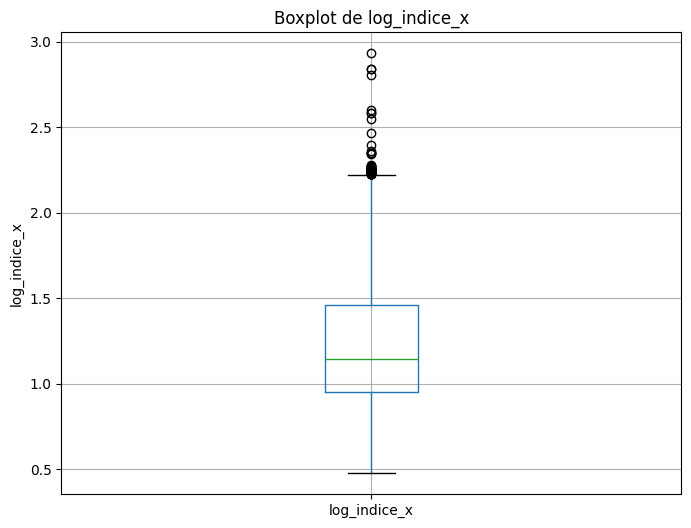

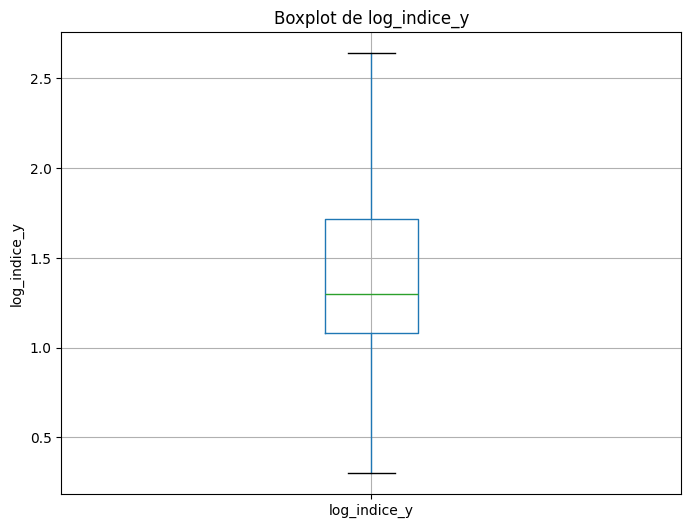

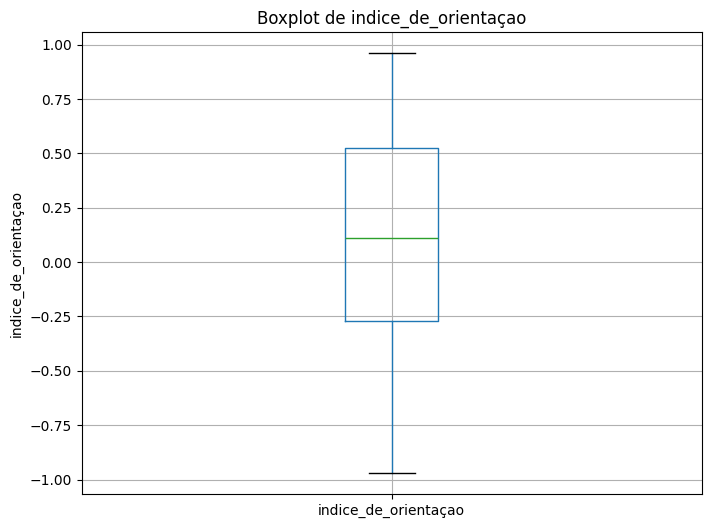

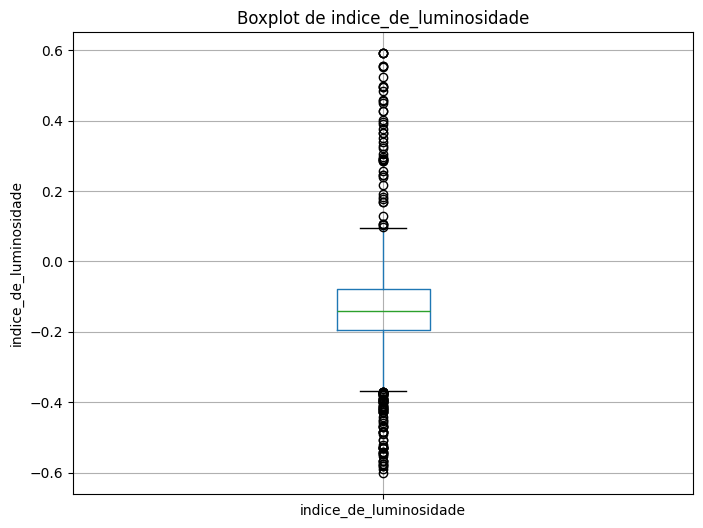

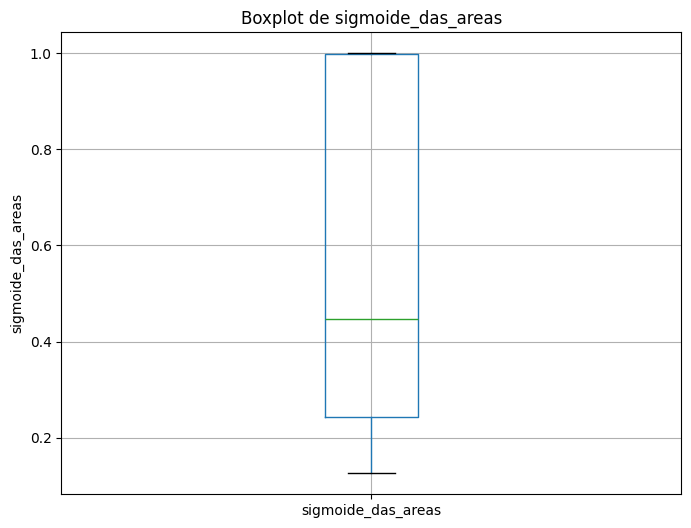

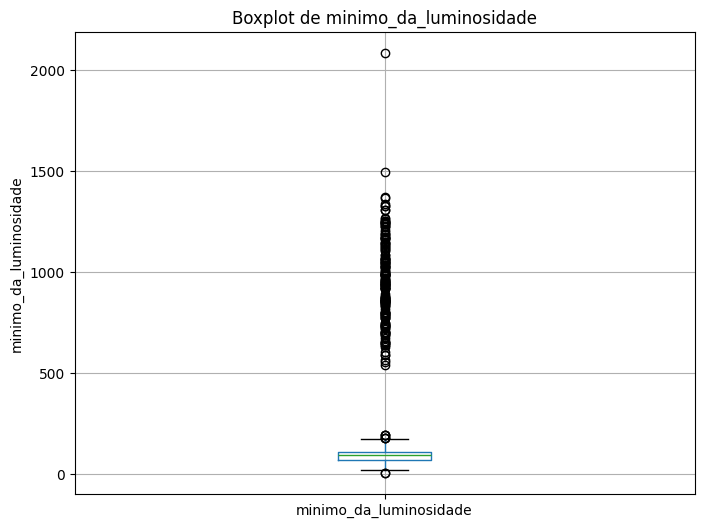

In [ ]:
# Gerando um grafico boxplot das variaveis numéricas.

numeric_cols = new_df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    new_df.boxplot(column=[col])
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)
    plt.show()


In [ ]:

print(f"O dataset possui {len(df)} linhas.")


O dataset possui 3390 linhas.


# Tratando os outliers

In [ ]:
# Tratando outliers com a mediana e Q1 e Q3 > 1.5.
numeric_cols = new_df.select_dtypes(include=np.number).columns

for col in numeric_cols:

    Q1 = new_df[col].quantile(0.25)
    Q3 = new_df[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    outliers = new_df[(new_df[col] < lower_bound) | (new_df[col] > upper_bound)]
    median_val = new_df[col].median()
    new_df.loc[(new_df[col] < lower_bound) | (new_df[col] > upper_bound), col] = median_val


<ipython-input-399-30c391e370bf>:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1690.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_df.loc[(new_df[col] < lower_bound) | (new_df[col] > upper_bound), col] = median_val
<ipython-input-399-30c391e370bf>:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '162.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_df.loc[(new_df[col] < lower_bound) | (new_df[col] > upper_bound), col] = median_val


In [ ]:

print(f"O dataset possui {len(df)} linhas.")


O dataset possui 3390 linhas.


In [ ]:


print(f"O dataset possui {len(df)} linhas.")


O dataset possui 3390 linhas.


In [ ]:

# Visualizando  as variaveis que ainda possuem outliers.

numeric_cols = new_df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    Q1 = new_df[col].quantile(0.25)
    Q3 = new_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    outliers = new_df[(new_df[col] < lower_bound) | (new_df[col] > upper_bound)]
    if not outliers.empty:
        print(f"Column '{col}' still has outliers.")



Column 'y_minimo' still has outliers.
Column 'y_maximo' still has outliers.
Column 'area_pixels' still has outliers.
Column 'perimetro_x' still has outliers.
Column 'perimetro_y' still has outliers.
Column 'soma_da_luminosidade' still has outliers.
Column 'index_externo_x' still has outliers.
Column 'indice_de_luminosidade' still has outliers.


# Tratando as colunas que ainda possuem outliers.

In [ ]:
# tratando  as variaveis que ainda possuem outliers com a mediana Q1 e Q3 > 1.5.

numeric_cols = new_df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    Q1 = new_df[col].quantile(0.25)
    Q3 = new_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    outliers = new_df[(new_df[col] < lower_bound) | (new_df[col] > upper_bound)]
    if not outliers.empty:
        print(f"Column '{col}' still has outliers.")


Column 'y_minimo' still has outliers.
Column 'y_maximo' still has outliers.
Column 'area_pixels' still has outliers.
Column 'perimetro_x' still has outliers.
Column 'perimetro_y' still has outliers.
Column 'soma_da_luminosidade' still has outliers.
Column 'index_externo_x' still has outliers.
Column 'indice_de_luminosidade' still has outliers.


In [ ]:
# Verificando a proporção de outliers em relação ao total do meu dataframe.

numeric_cols = new_df.select_dtypes(include=np.number).columns
total_outliers = 0

for col in numeric_cols:
    Q1 = new_df[col].quantile(0.25)
    Q3 = new_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    outliers = new_df[(new_df[col] < lower_bound) | (new_df[col] > upper_bound)]
    num_outliers = len(outliers)
    total_outliers += num_outliers
    print(f"Column '{col}': {num_outliers} outliers")


total_rows = len(new_df)
outlier_percentage = (total_outliers / total_rows) * 100

print(f"\nTotal number of outliers across all numeric columns: {total_outliers}")
print(f"Percentage of outliers in the DataFrame: {outlier_percentage:.2f}%")


Column 'id': 0 outliers
Column 'x_minimo': 0 outliers
Column 'x_maximo': 0 outliers
Column 'y_minimo': 32 outliers
Column 'y_maximo': 8 outliers
Column 'area_pixels': 163 outliers
Column 'perimetro_x': 150 outliers
Column 'perimetro_y': 142 outliers
Column 'soma_da_luminosidade': 147 outliers
Column 'maximo_da_luminosidade': 0 outliers
Column 'comprimento_do_transportador': 0 outliers
Column 'espessura_da_chapa_de_aço': 0 outliers
Column 'temperatura': 0 outliers
Column 'index_de_bordas': 0 outliers
Column 'index_vazio': 0 outliers
Column 'index_quadrado': 0 outliers
Column 'index_externo_x': 102 outliers
Column 'indice_de_bordas_x': 0 outliers
Column 'indice_de_bordas_y': 0 outliers
Column 'indice_de_variacao_x': 0 outliers
Column 'indice_de_variacao_y': 0 outliers
Column 'indice_global_externo': 0 outliers
Column 'log_das_areas': 0 outliers
Column 'log_indice_x': 0 outliers
Column 'log_indice_y': 0 outliers
Column 'indice_de_orientaçao': 0 outliers
Column 'indice_de_luminosidade': 12

In [ ]:
# Tratando os outliers com Q1 e Q3 em 1.5.
numeric_cols = new_df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    Q1 = new_df[col].quantile(0.25)
    Q3 = new_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = new_df[(new_df[col] < lower_bound) | (new_df[col] > upper_bound)]
    if not outliers.empty:
        median_val = new_df[col].median()
        new_df.loc[(new_df[col] < lower_bound) | (new_df[col] > upper_bound), col] = median_val
        print(f"Outliers in '{col}' replaced with the median.")


Outliers in 'y_minimo' replaced with the median.
Outliers in 'y_maximo' replaced with the median.
Outliers in 'area_pixels' replaced with the median.
Outliers in 'perimetro_x' replaced with the median.
Outliers in 'perimetro_y' replaced with the median.
Outliers in 'soma_da_luminosidade' replaced with the median.
Outliers in 'maximo_da_luminosidade' replaced with the median.
Outliers in 'espessura_da_chapa_de_aço' replaced with the median.
Outliers in 'temperatura' replaced with the median.
Outliers in 'index_vazio' replaced with the median.
Outliers in 'index_externo_x' replaced with the median.
Outliers in 'indice_de_variacao_x' replaced with the median.
Outliers in 'indice_de_variacao_y' replaced with the median.
Outliers in 'log_das_areas' replaced with the median.
Outliers in 'log_indice_x' replaced with the median.
Outliers in 'indice_de_luminosidade' replaced with the median.
Outliers in 'minimo_da_luminosidade' replaced with the median.


<ipython-input-405-09f59babf4de>:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1278439.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_df.loc[(new_df[col] < lower_bound) | (new_df[col] > upper_bound), col] = median_val


In [ ]:
# Verificando a proporção de outliers.

numeric_cols = new_df.select_dtypes(include=np.number).columns
total_outliers = 0

for col in numeric_cols:
    Q1 = new_df[col].quantile(0.25)
    Q3 = new_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    outliers = new_df[(new_df[col] < lower_bound) | (new_df[col] > upper_bound)]
    num_outliers = len(outliers)
    total_outliers += num_outliers
    print(f"Column '{col}': {num_outliers} outliers")


total_rows = len(new_df)
outlier_percentage = (total_outliers / total_rows) * 100

print(f"\nTotal number of outliers across all numeric columns: {total_outliers}")
print(f"Percentage of outliers in the DataFrame: {outlier_percentage:.2f}%")


Column 'id': 0 outliers
Column 'x_minimo': 0 outliers
Column 'x_maximo': 0 outliers
Column 'y_minimo': 0 outliers
Column 'y_maximo': 0 outliers
Column 'area_pixels': 0 outliers
Column 'perimetro_x': 30 outliers
Column 'perimetro_y': 56 outliers
Column 'soma_da_luminosidade': 0 outliers
Column 'maximo_da_luminosidade': 0 outliers
Column 'comprimento_do_transportador': 0 outliers
Column 'espessura_da_chapa_de_aço': 0 outliers
Column 'temperatura': 0 outliers
Column 'index_de_bordas': 0 outliers
Column 'index_vazio': 0 outliers
Column 'index_quadrado': 0 outliers
Column 'index_externo_x': 0 outliers
Column 'indice_de_bordas_x': 0 outliers
Column 'indice_de_bordas_y': 0 outliers
Column 'indice_de_variacao_x': 0 outliers
Column 'indice_de_variacao_y': 0 outliers
Column 'indice_global_externo': 0 outliers
Column 'log_das_areas': 0 outliers
Column 'log_indice_x': 0 outliers
Column 'log_indice_y': 0 outliers
Column 'indice_de_orientaçao': 0 outliers
Column 'indice_de_luminosidade': 0 outliers


# Tratando outliers remanescentes.

In [ ]:
# Tratando outliers remanescentes.
for col in ['perimetro_x', 'perimetro_y']:
    if col in new_df.columns:
        Q1 = new_df[col].quantile(0.25)
        Q3 = new_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median_val = new_df[col].median()
        new_df.loc[(new_df[col] < lower_bound) | (new_df[col] > upper_bound), col] = median_val
        print(f"Outliers in '{col}' replaced with the median.")
    else:
        print(f"Column '{col}' not found in the DataFrame.")


Outliers in 'perimetro_x' replaced with the median.
Outliers in 'perimetro_y' replaced with the median.


In [ ]:
print(f"O dataset possui {len(df)} linhas.")

O dataset possui 3390 linhas.


# Preparar o ambiente para treino e teste.

# Transformando dados categóricos em numéricos

In [ ]:
# Transformando os dados categóricos em dados numéricos usando o LabelEncoder da biblioteca Sklearn.

le = LabelEncoder()

new_df['falha'] = le.fit_transform(new_df['falha'])
new_df['tipo_aço'] = le.fit_transform(new_df['tipo_aço'])

print(new_df.head(20))


      id  x_minimo  x_maximo   y_minimo  y_maximo  area_pixels  perimetro_x  \
0    0.0       154     169.0   260124.0    260136        75.00           27   
1    2.0        41     216.0  2708878.0   2708939       162.50           25   
2    3.0       129     157.0    86408.0     86427       276.00           39   
3    4.0       436     442.0  1278439.5    530985        63.00           17   
4    6.0        39     217.0  1359602.0   1359742       162.50           25   
5    9.0        41    -186.0  1505915.0   1505982       162.50           25   
6   10.0       843    -186.0     6712.0      6724        98.00           14   
7   11.0      1331    1336.0  4270168.0   4270218       177.00           15   
8   12.0       -11     835.0  1553913.0   1553931        71.00            8   
9   13.0        41     210.0      -20.0   4440576       162.50           25   
10  15.0       435     729.0  1278439.5   1105387       162.25           25   
11  16.0      1214    1222.0   737538.0    737568   

# Gerando um grafico de correlação.

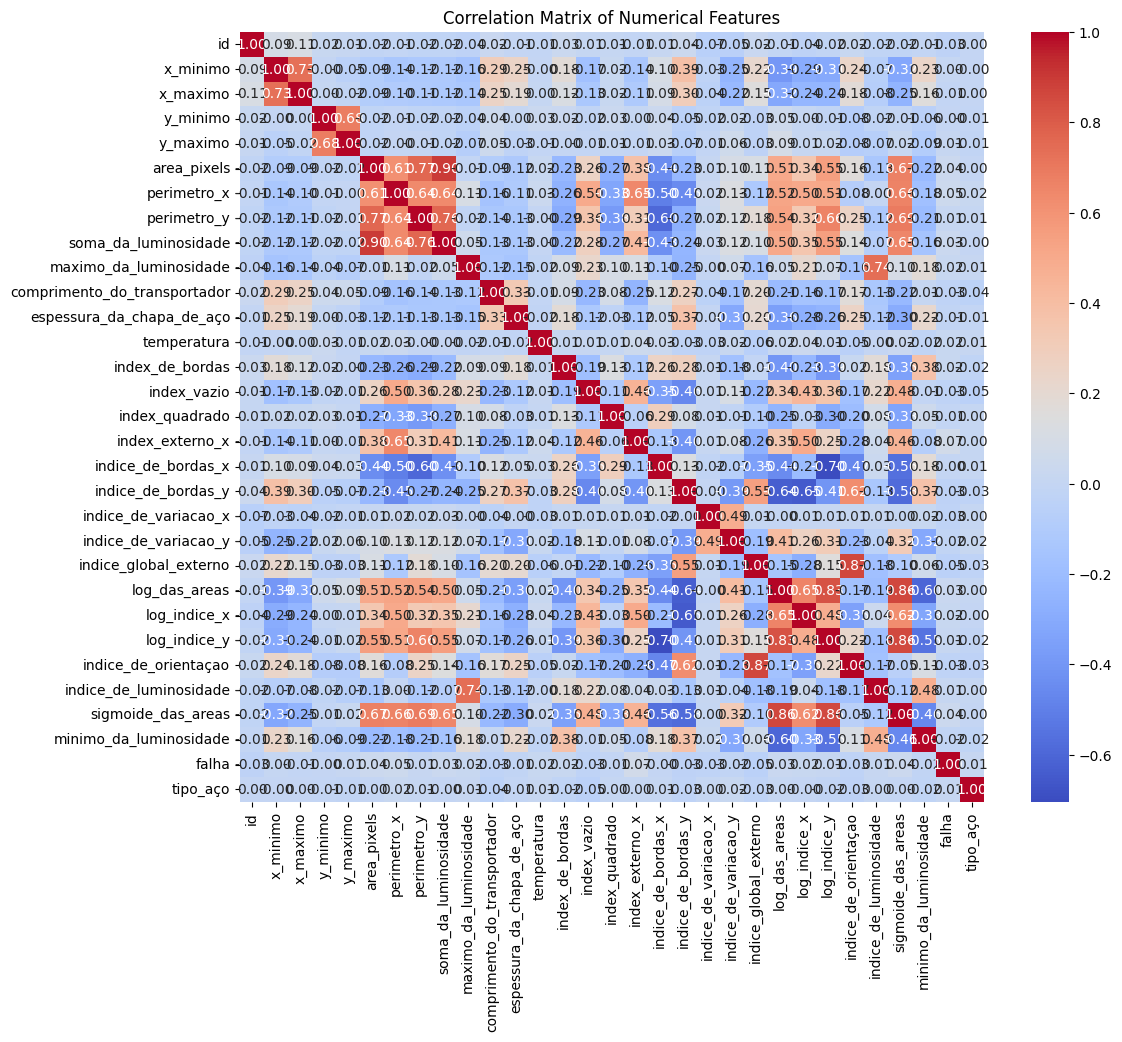

In [ ]:
# Gerando um grafico de correlação.

import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = new_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [ ]:
print(f"O dataset possui {len(df)} linhas.")

O dataset possui 3390 linhas.


# Divindo os dados em duas partes 80% para treino e 20% para teste.

In [ ]:
# Separando meu dataframe em 80% para treino e 20% para teste.

X = new_df.drop('falha', axis=1)
y = new_df['falha']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (1528, 30)
y_train shape: (1528,)
X_test shape: (382, 30)
y_test shape: (382,)


# Iniciando o treinamento.

In [ ]:
# Iniciando o treino usando o X G Boost.

import xgboost as xgb

model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y_train.unique()), random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy: 0.16753926701570682
              precision    recall  f1-score   support

           0       0.29      0.17      0.22        59
           1       0.12      0.21      0.15        38
           2       0.18      0.18      0.18        61
           3       0.14      0.14      0.14        63
           4       0.15      0.14      0.14        56
           5       0.20      0.20      0.20        51
           6       0.15      0.15      0.15        54

    accuracy                           0.17       382
   macro avg       0.18      0.17      0.17       382
weighted avg       0.18      0.17      0.17       382



# Fazendo testes e balanceamento das classes.

In [ ]:
# Balanceando as classe com SMOTE.
from imblearn.over_sampling import SMOTE


print("Distribuição das classes antes do balanceamento:")
print(y_train.value_counts())


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nDistribuição das classes após o balanceamento:")
print(y_train_resampled.value_counts())


model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y_train_resampled.unique()), random_state=42)


model.fit(X_train_resampled, y_train_resampled)




Distribuição das classes antes do balanceamento:
falha
1    235
5    222
6    218
4    217
0    214
2    212
3    210
Name: count, dtype: int64

Distribuição das classes após o balanceamento:
falha
5    235
1    235
6    235
2    235
4    235
0    235
3    235
Name: count, dtype: int64


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=7,
              num_parallel_tree=None, ...)

In [ ]:
# Fazendo a etapa de classificação.
from xgboost import XGBClassifier

modelo = XGBClassifier(
    objective='multi:softmax',
    num_class=7,
    eval_metric='mlogloss',
    use_label_encoder=False,
    learning_rate=0.1,
    max_depth=6,
    n_estimators=100,
    random_state=42
)


# Modelo de treino com o melhor desempenho.

# O modelo escolhido o SGDClassifier a cada lote de dados, ele realiza uma atualização do modelo e calcula a acurácia para esse lote específico.

In [ ]:
# Treino com o modelo SGDC Classifier.
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

import numpy as np

# Simula dados para classificação binária
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

scaler = StandardScaler()
model = SGDClassifier(loss='log_loss', random_state=42)

batch_size = 100
all_preds = []
all_labels = []

scaler.fit(X)

for i in range(0, len(X), batch_size):
    X_batch = X[i:i+batch_size]
    y_batch = y[i:i+batch_size]

    X_batch_scaled = scaler.transform(X_batch)

    if i == 0:
        model.partial_fit(X_batch_scaled, y_batch, classes=np.unique(y))
    else:
        model.partial_fit(X_batch_scaled, y_batch)

    y_pred = model.predict(X_batch_scaled)

    acc = accuracy_score(y_batch, y_pred)
    print(f"Lote {i//batch_size + 1}: Acurácia = {acc:.2f}")


Lote 1: Acurácia = 0.87
Lote 2: Acurácia = 0.94
Lote 3: Acurácia = 0.85
Lote 4: Acurácia = 0.91
Lote 5: Acurácia = 0.82
Lote 6: Acurácia = 0.85
Lote 7: Acurácia = 0.82
Lote 8: Acurácia = 0.83
Lote 9: Acurácia = 0.83
Lote 10: Acurácia = 0.87


# Visualizando a acurácia de aprendizado a cada tentativa.

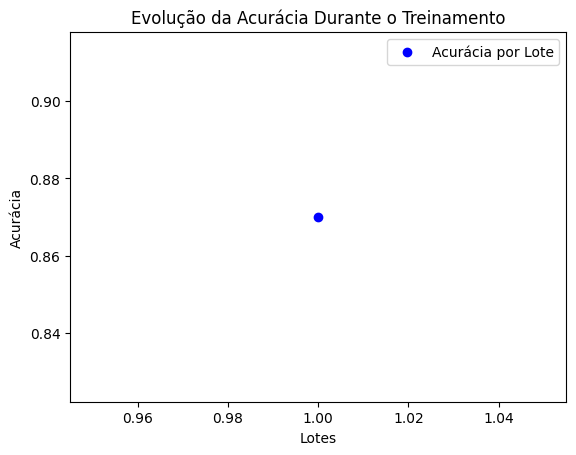

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
# Grafico para visualizar a acuracia a cada treino feito.
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

scaler = StandardScaler()
model = SGDClassifier(loss='log_loss', random_state=42)

batch_size = 100
accuracies = []

scaler.fit(X)

plt.ion()
fig, ax = plt.subplots()

for i in range(0, len(X), batch_size):
    X_batch = X[i:i+batch_size]
    y_batch = y[i:i+batch_size]

    X_batch_scaled = scaler.transform(X_batch)

    if i == 0:
        model.partial_fit(X_batch_scaled, y_batch, classes=np.unique(y))
    else:
        model.partial_fit(X_batch_scaled, y_batch)

    y_pred = model.predict(X_batch_scaled)

    acc = accuracy_score(y_batch, y_pred)
    accuracies.append(acc)

    ax.clear()
    ax.scatter(range(1, len(accuracies) + 1), accuracies, label='Acurácia por Lote', color='blue')
    ax.set_xlabel('Lotes')
    ax.set_ylabel('Acurácia')
    ax.set_title('Evolução da Acurácia Durante o Treinamento')
    ax.legend()
    plt.draw()
    plt.pause(0.1)

plt.ioff()
plt.show()
